Importer les bibliothèques suivantes :

In [1]:
import pandas as pd
import numpy as np

import zipfile as zf
import tarfile


import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

from numba import jit

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# from functools import reduce
from urllib import request
import os

from PIL import Image
import io, bson, multiprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lire le fichier csv généré précédemment (Santé_01_notebooknettoyage.ipynb), et l'affecter à une DataFrames :

In [3]:
df_food_fr = pd.read_csv("/content/drive/MyDrive/OpenClassRooms/Projet 3/Data_Food/df_food_fr.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Analyse univariée**

Ci-dessous le graphique représentant le Nutri-score des aliments :

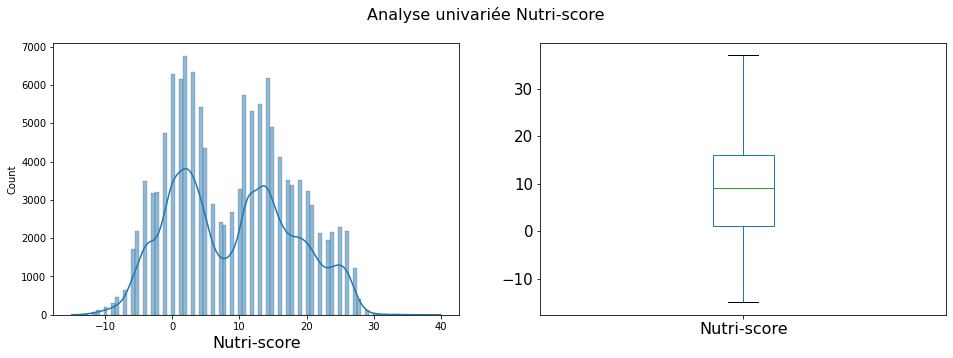

In [4]:
# Graph Nutriscore
plt.figure(1)

plt.subplot(121)
fig = sns.histplot(data=df_food_fr, x=df_food_fr['nutriscore_score'], kde=True)


plt.subplot(122)
ax = df_food_fr['nutriscore_score'].plot.box(figsize=(16,5), showfliers=False)
ax.set_xticklabels(["Nutri-score"])

plt.suptitle('Analyse univariée Nutri-score',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=15)
fig.set_xlabel('Nutri-score', fontsize=16)

plt.show()


Ci-dessous le graphique camembert  représentant le Nutri-grade

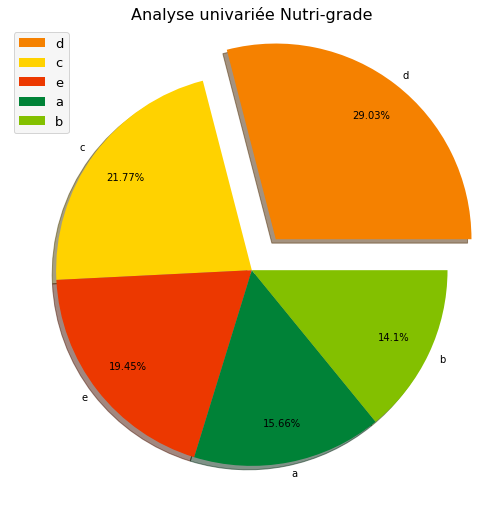

In [5]:
plt.figure(figsize = (9, 9))

y = df_food_fr['nutriscore_grade'].value_counts().index
x = df_food_fr['nutriscore_grade'].value_counts().values

plt.pie(x, labels = y,
           colors = ['#f58100', '#ffd200', '#ec3800', '#008237','#83c000'],
           explode = [0.2, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.8, labeldistance = 1.06,
           shadow = True)

plt.title('Analyse univariée Nutri-grade', fontsize=16)

plt.legend(loc=2,fontsize=13,facecolor='#f4f4f4')

***Remarque :***

La majorité des produits ont un Nutri-score « d », « c » et « e », ce qui représente environ 70% des aliments, et les aliments avec un Nutri-score «a» ne représentent que 15%

Ci-dessous le graphique représentant l’Eco-score des aliments 

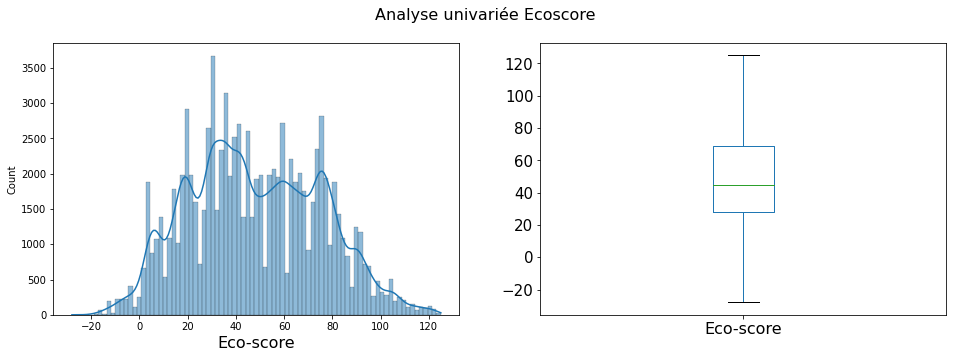

In [6]:
# Graph Ecoscore
plt.figure(1)

plt.subplot(121)
fig = sns.histplot(data=df_food_fr, x=df_food_fr['ecoscore_score_fr'], kde=True)

fig.set_xlabel('Eco-score', fontsize=16)


plt.subplot(122)
ax = df_food_fr['ecoscore_score_fr'].plot.box(figsize=(16,5))
ax.set_xticklabels(["Eco-score"])


plt.suptitle('Analyse univariée Ecoscore', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=15)
plt.show()

Ci-dessous le graphique représentant l’Eco-grade :

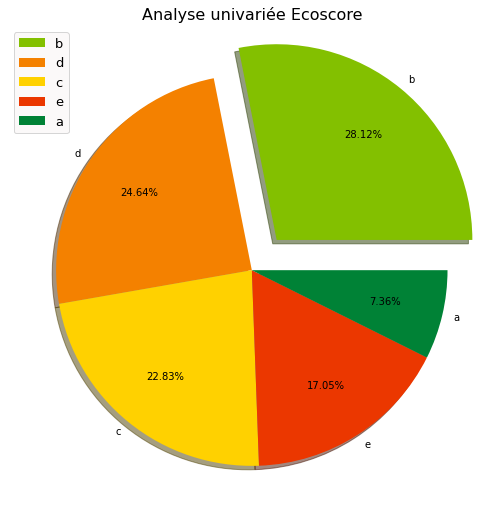

In [7]:
plt.figure(figsize = (9, 9))

y = df_food_fr['ecoscore_grade_fr'].value_counts().index
x = df_food_fr['ecoscore_grade_fr'].value_counts().values

plt.pie(x, labels = y,
          #  colors = ['#f58100', '#ffd200', '#ec3800', '#008237','#83c000'],
           colors = ['#83c000', '#f48100', '#ffd100', '#eb3700','#008236'],
           explode = [0.2, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.06,
           shadow = True)

plt.title('Analyse univariée Ecoscore', fontsize=16)

plt.legend(loc=2,fontsize=13,facecolor='#fbf8f8')

***Remarque :***

L’eco-score le plus répondu est le « b » (28.11%), par contre l’ecos-core « a » ne représente que 7.25%	.

Ci-dessous le graphique représentant la classification NOVA des aliments :


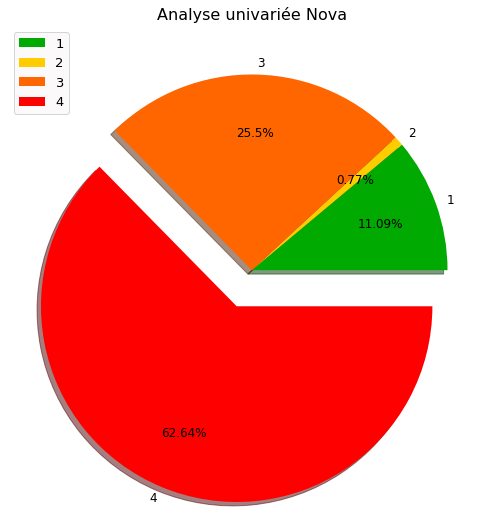

In [8]:
plt.figure(figsize = (9, 9))

df_food_fr['nova_group'] = df_food_fr['nova_group'].apply(np.int64)

y = df_food_fr['nova_group'].value_counts(sort=False).index
x = df_food_fr['nova_group'].value_counts(sort=False).values

plt.pie(x, labels = y,
           colors = ['#00aa00', '#ffcc00', '#ff6600', '#ff0000'],
           explode = [0, 0, 0, 0.2],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.06,
           textprops={'fontsize': 12},
           shadow = True,)

plt.title('Analyse univariée Nova', fontsize=16)

plt.legend(loc=2,fontsize=13,facecolor='#fbf8f8')

***Remarque :*** 

On constate que les aliments ultra transformés (Groupe 4) représentent la majorité des aliments (62.83%), suivi des aliments transformés (Groupe 3).


Ci-dessous le graphique représentant la quantité du sucre dans les aliments (Pour 100g):

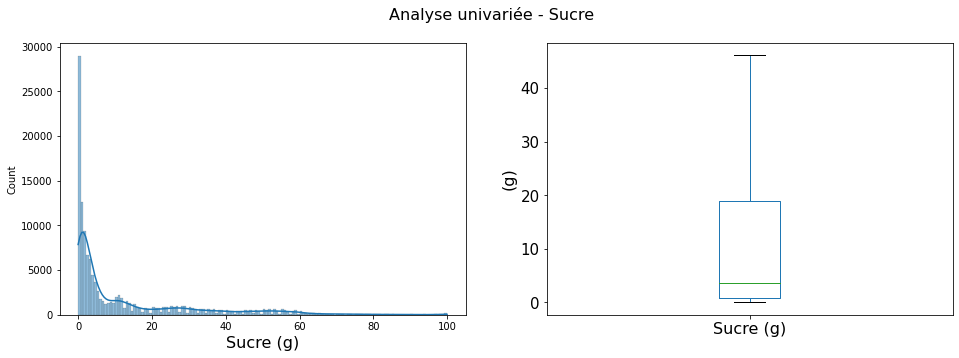

In [9]:
# Graph Nutriscore
plt.figure(1)

plt.subplot(121)
ax = sns.histplot(data=df_food_fr, x=df_food_fr['sugars_100g'], kde=True)
ax.set_xlabel('Sucre (g)', fontsize=16)


plt.subplot(122)
fig = df_food_fr['sugars_100g'].plot.box(figsize=(16,5), showfliers=False)
fig.set_xticklabels(["Sucre (g)"])
fig.set_ylabel('(g)', fontsize=16)

plt.suptitle('Analyse univariée - Sucre',fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=15)

plt.show()


Ci-dessous le graphique représentant la quantité des lipides dans les aliments (Pour 100g):

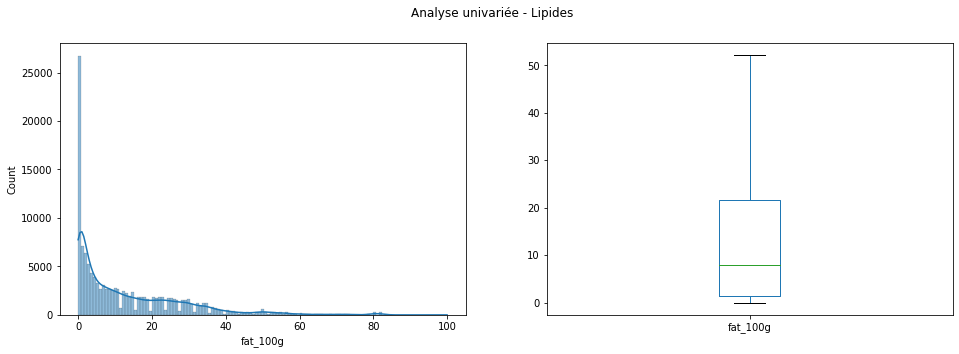

In [10]:
# Graph Nutriscore
plt.figure(1)

plt.subplot(121)
fig = sns.histplot(data=df_food_fr, x=df_food_fr['fat_100g'], kde=True)

plt.subplot(122)
fig = df_food_fr['fat_100g'].plot.box(figsize=(16,5), showfliers=False)

plt.suptitle('Analyse univariée - Lipides')

plt.show()


Ci-dessous le graphique représentant la quantité des glucides dans les aliments (Pour 100g):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


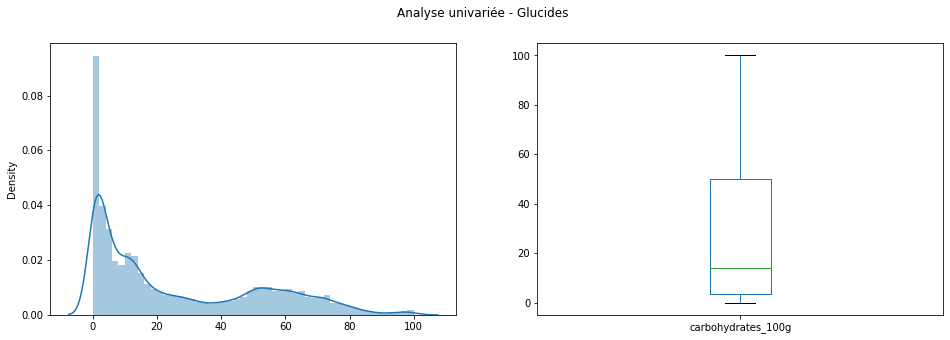

In [11]:
# Graph Nutriscore
plt.figure(1)

plt.subplot(121)
fig = sns.distplot(x=df_food_fr['carbohydrates_100g'])

plt.subplot(122)
fig = df_food_fr['carbohydrates_100g'].plot.box(figsize=(16,5))

plt.suptitle('Analyse univariée - Glucides')

plt.show()


**Analyse bivariée**

Corrélation des variables numériques

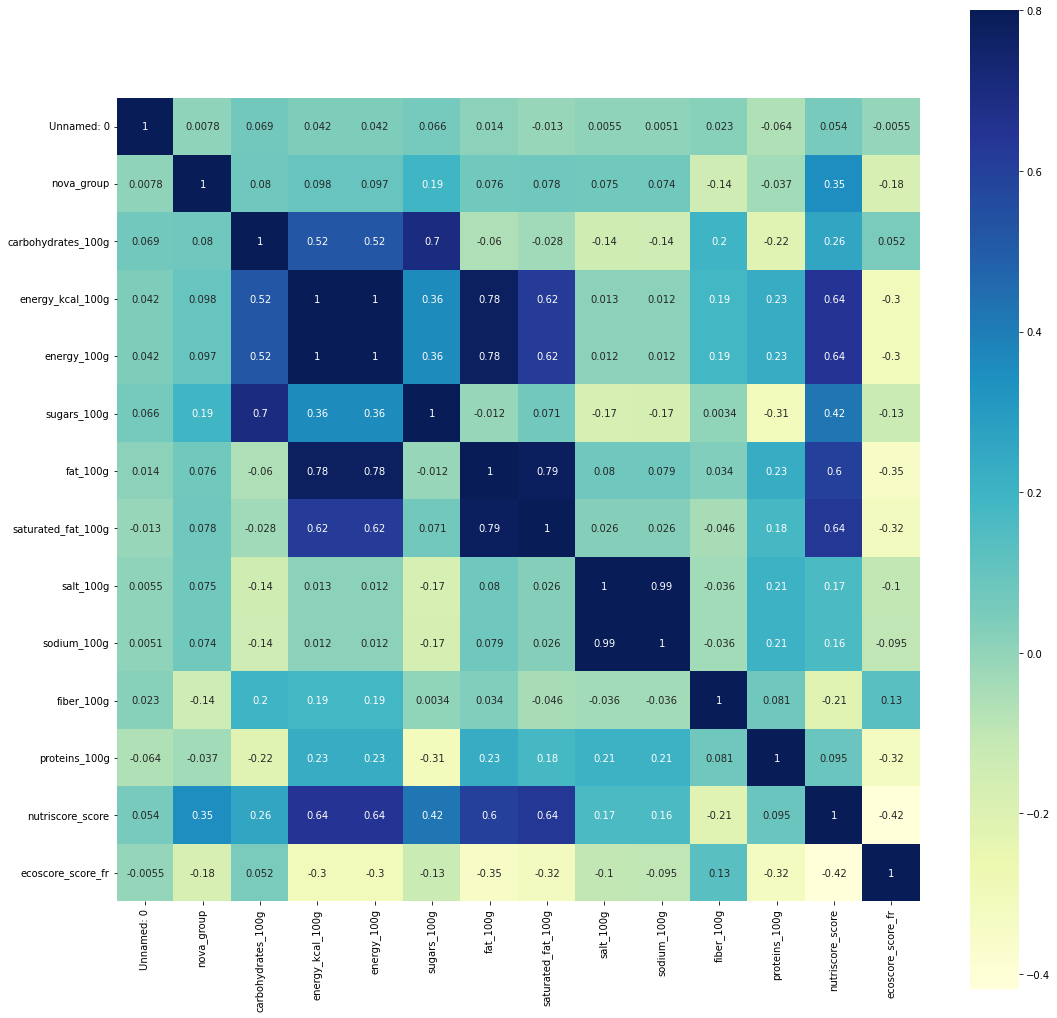

In [12]:
matrix = df_food_fr.corr()
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(matrix, vmax=.8,square=True,cmap="YlGnBu", annot=True)

La matrice de corrélation ci-dessus, montre une corrélation forte entre les variables ci-dessous : 

*   Le sucre et les glucides (0.7).
*   L’énergie et les lipides (0.78).
*   Le nutri-score et le gras saturé (0.64)
*   Le nutri-score et l’énergie (0.64)
*   Le sel et le sodium (0.99)


Graphique boite à moustache pour identifier la corrélation entre le sucre et le nutri-score

Text(0, 0.5, 'Sucre (g)')

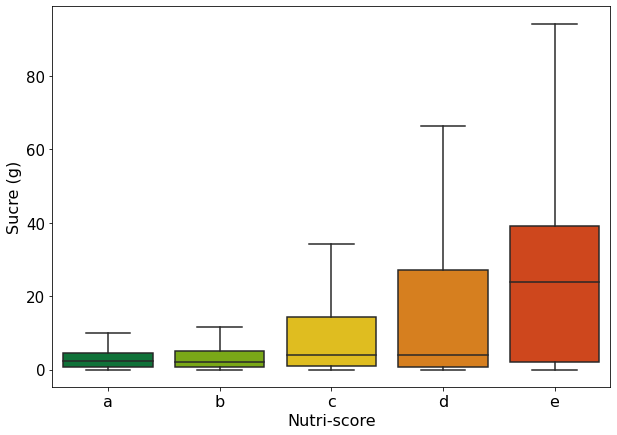

In [13]:
ax, fig = plt.subplots(figsize=[10,7])

colors = ['#008236', '#83c000', '#ffd100', '#f48100','#eb3700']

sns.set_palette(sns.color_palette(colors))

sns.boxplot(x="nutriscore_grade", y="sugars_100g", data=df_food_fr.sort_values(by=['nutriscore_grade'],ascending=True), showfliers=False)


# # fill with colors
# for patch, color in zip(box['boxes'], colors):
#   patch.set_facecolor(color)




plt.xticks(fontsize=16)
plt.yticks(fontsize=15)
fig.set_xlabel('Nutri-score', fontsize=16)
fig.set_ylabel('Sucre (g)',fontsize=16)

***Remarque :*** 

Si le sucre est élevé, l’aliment est moins bon en terme de qualité nutritionnelle (Nutri-score E).


Graphique pour déterminer la relation entre les lipides et l'énergie :

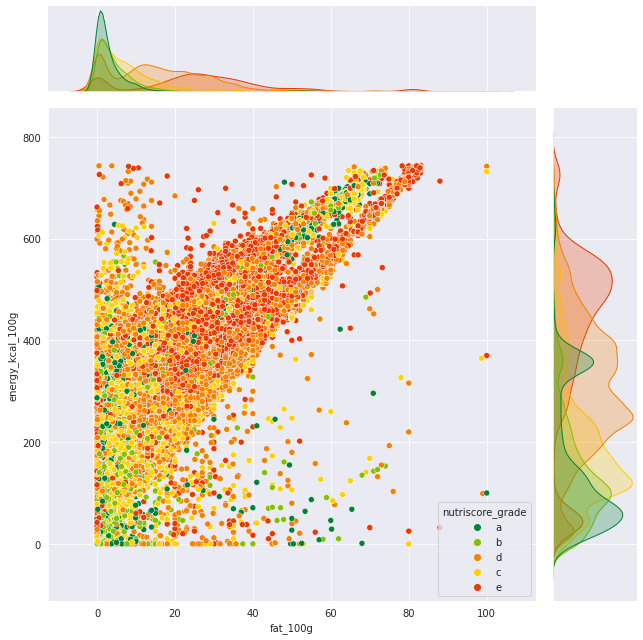

In [54]:
colors = ['#008236', '#83c000', '#f48100', '#ffd100','#eb3700']

sns.set_palette(sns.color_palette(colors))

sns.jointplot(x="fat_100g", y="energy_kcal_100g", data=df_food_fr, height=9, hue="nutriscore_grade")

***Remarque :*** 

Si les lipides sont élevés, l’aliment est moins bon en terme de qualité nutritionnelle et les calories augmentent aussi .

Graphique pour identifier la relation entre le sucre et les glucide:

AttributeError: ignored

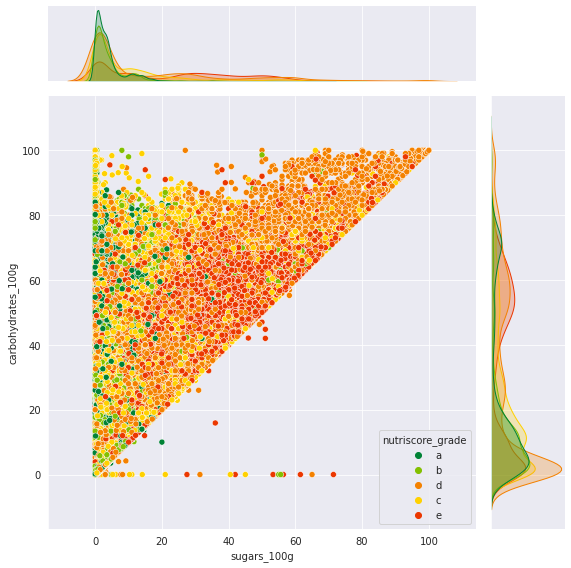

In [47]:
colors = ['#008236', '#83c000', '#f48100', '#ffd100','#eb3700']

sns.set_palette(sns.color_palette(colors))

figure = sns.jointplot(x="sugars_100g", y="carbohydrates_100g", data=df_food_fr, height=8, hue="nutriscore_grade")

figure.legend(bbox_to_anchor= (1.2,1))
plt.show()

***Remarque :***

Si le sucre est élevé, la quantité des glucides augmente aussi

Calculer la moyenne des valeurs nutritives (sucre, énergie, lipides, glucides, protéines, sel) pour chaque catégorie d'aliments

In [16]:
categorie = df_food_fr['pnns_groups_1'].unique()

df_categorie = pd.DataFrame(index=range(0,len(categorie)), columns = ['Categorie'])
df_categorie['Moyenne_sucre'] = 0
df_categorie['Moyenne_energie'] = 0
df_categorie['Moyenne_lipide'] = 0
df_categorie['Moyenne_glucide'] = 0
df_categorie['Moyenne_proteine'] = 0
df_categorie['Moyenne_sel'] = 0

for i in range (len(categorie)):
  df_categorie['Categorie'][i] = categorie[i]
  df_categorie['Moyenne_sucre'].values[i] = df_food_fr['sugars_100g'][df_food_fr['pnns_groups_1'] == categorie[i]].mean()
  df_categorie['Moyenne_energie'].values[i] = df_food_fr['energy_kcal_100g'][df_food_fr['pnns_groups_1'] == categorie[i]].mean()
  df_categorie['Moyenne_lipide'].values[i] = df_food_fr['fat_100g'][df_food_fr['pnns_groups_1'] == categorie[i]].mean()
  df_categorie['Moyenne_glucide'].values[i] = df_food_fr['carbohydrates_100g'][df_food_fr['pnns_groups_1'] == categorie[i]].mean()
  df_categorie['Moyenne_proteine'].values[i] = df_food_fr['proteins_100g'][df_food_fr['pnns_groups_1'] == categorie[i]].mean()
  df_categorie['Moyenne_sel'].values[i] = df_food_fr['salt_100g'][df_food_fr['pnns_groups_1'] == categorie[i]].mean()

df_categorie

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Categorie,Moyenne_sucre,Moyenne_energie,Moyenne_lipide,Moyenne_glucide,Moyenne_proteine,Moyenne_sel
0,Cereals and potatoes,5,322,6,53,9,0
1,Composite foods,2,175,8,16,7,1
2,Milk and dairy products,8,208,14,10,10,0
3,Fruits and vegetables,12,110,2,17,2,0
4,Sugary snacks,38,414,18,56,5,0
5,unknown,14,266,11,29,9,1
6,Beverages,9,51,0,10,0,0
7,Fat and sauces,6,296,27,9,2,2
8,Fish Meat Eggs,0,211,13,2,19,2
9,Salty snacks,2,415,31,22,9,1


Graphique pour déterminer la relation entre le sucre et le sel pour chaque catégorie d’aliments : 


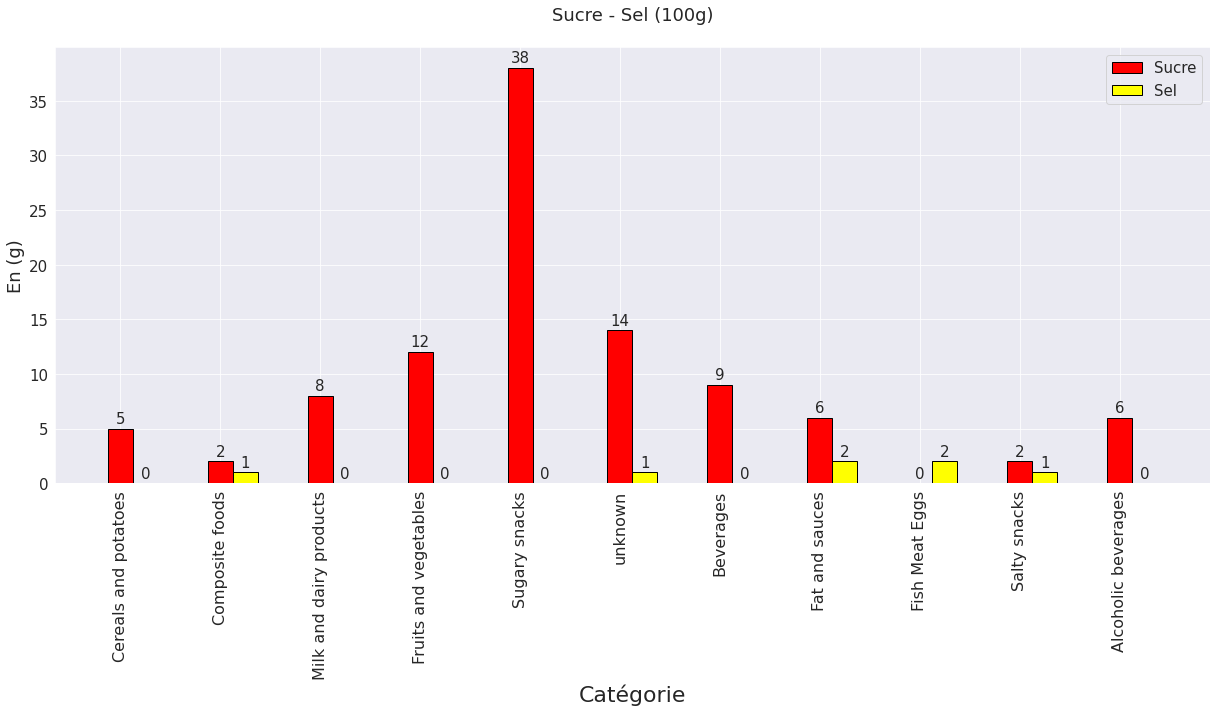

In [17]:
sns.set_style("darkgrid")


labels_i = df_categorie['Categorie']

xi = np.arange(len(labels_i)) 


width = 0.25  # the width of the bars

fig, ax = plt.subplots()

rects3 = ax.bar(xi,df_categorie['Moyenne_sucre'], width, label='Sucre', color='red', edgecolor="black", align='center')
rects4 = ax.bar(xi+width,df_categorie['Moyenne_sel'], width, label='Sel', color='yellow', edgecolor="black", align='center')


# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 15,
                #  rotation='vertical',
                )

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(17, 10)
ax.set_ylabel('En (g)', fontsize=18)
ax.set_title('Sucre - Sel (100g)\n', fontsize=18)
ax.set_xticks(xi)
ax.set_xticklabels(labels_i)
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=15)
ax.legend(fontsize=15)
plt.xlabel('Catégorie', fontsize=22)

fig.tight_layout()

Graphique pour déterminer l'énergie moyenne pour chaque catégorie d’aliments : 


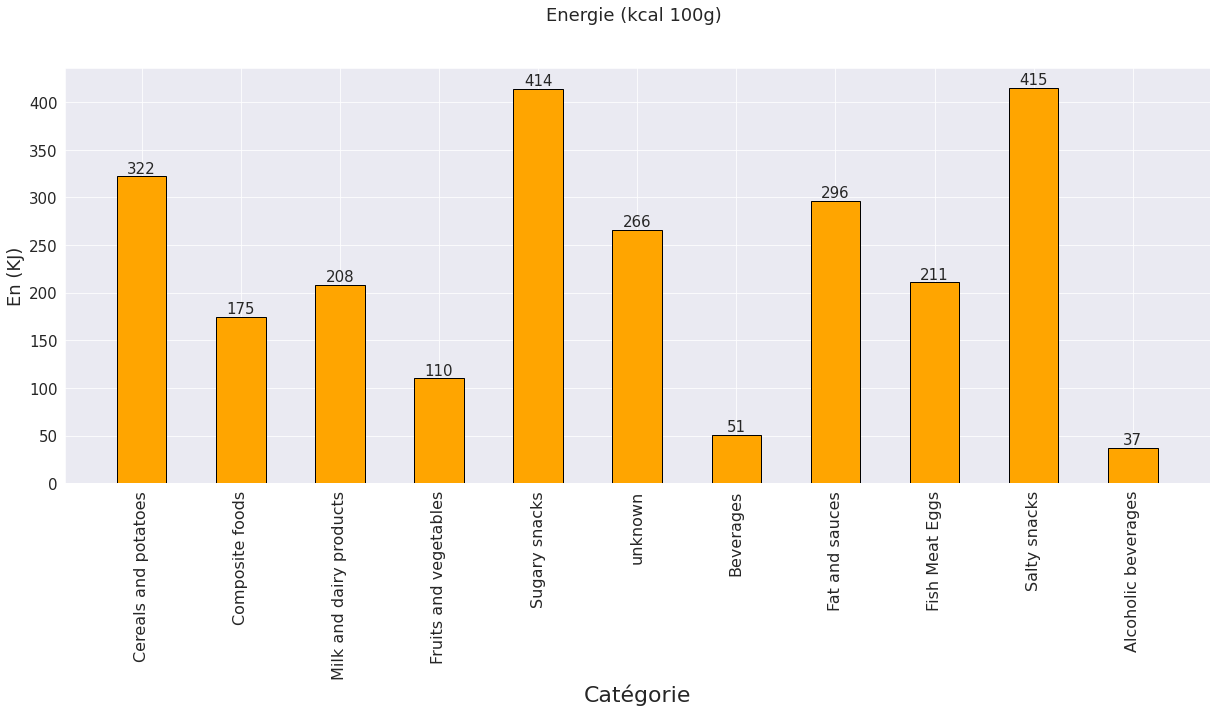

In [18]:
sns.set_style("darkgrid")


labels_i = df_categorie['Categorie']

xi = np.arange(len(labels_i)) 


width = 0.50  # the width of the bars

fig, ax = plt.subplots()

rects3 = ax.bar(xi,df_categorie['Moyenne_energie'], width, color='orange', edgecolor="black", align='center')

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 15,
                )

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(17, 10)
ax.set_ylabel('En (KJ)', fontsize=18)
ax.set_title('Energie (kcal 100g) \n\n', fontsize=18)
ax.set_xticks(xi)
ax.set_xticklabels(labels_i)
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=15)
plt.xlabel('Catégorie', fontsize=22)

fig.tight_layout()

Graphique pour déterminer la relation entre les glucides, les lipides et les protéines pour chaque catégorie d’aliments : 


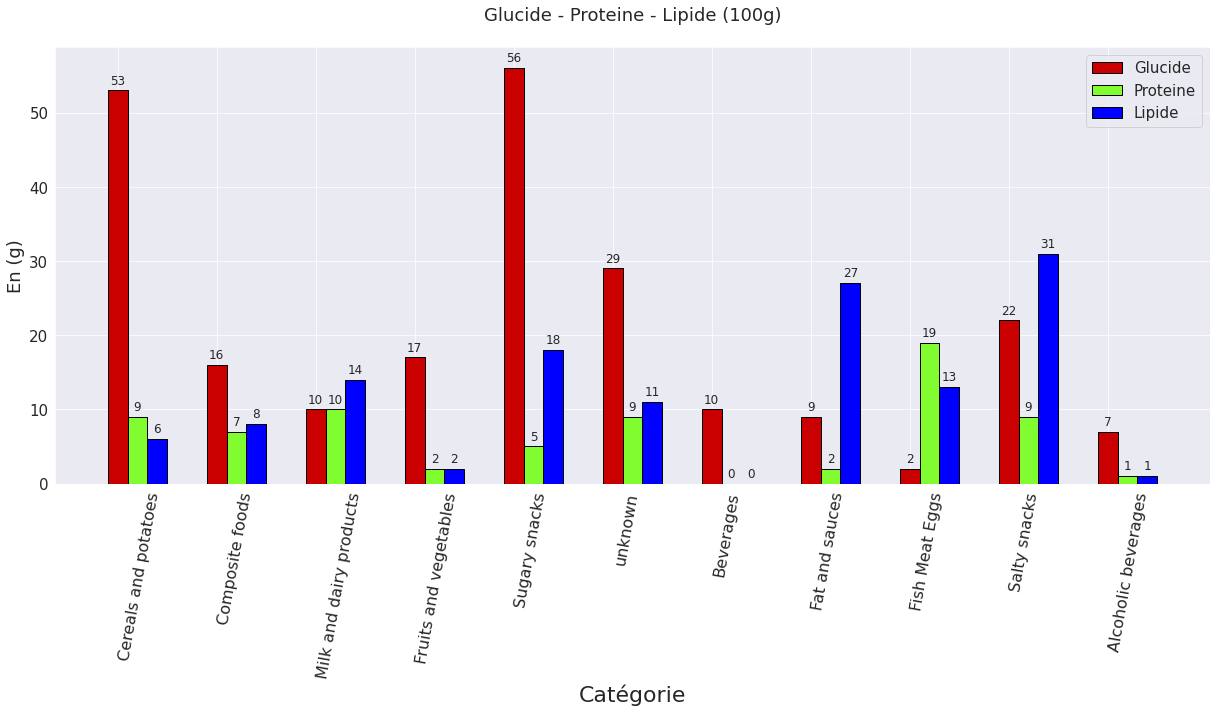

In [19]:
sns.set_style("darkgrid")


labels_i = df_categorie['Categorie']

xc = np.arange(len(labels_i)) 


width = 0.20  # the width of the bars

fig, ax = plt.subplots()

rects3 = ax.bar(xc,df_categorie['Moyenne_glucide'], width, label='Glucide',color='#CA0000', edgecolor="black", align='center')
rects4 = ax.bar(xc+width,df_categorie['Moyenne_proteine'], width, label='Proteine', color='#81FC30', edgecolor="black", align='center')
rects5 = ax.bar(xc+width*2,df_categorie['Moyenne_lipide'], width, label='Lipide', color='b', edgecolor="black", align='center')


# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 12,
                #  rotation='vertical',
                )

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(17, 10)
ax.set_ylabel('En (g)', fontsize=18)
ax.set_title('Glucide - Proteine - Lipide (100g)\n', fontsize=18)
ax.set_xticks(xc)
ax.set_xticklabels(labels_i)
plt.xticks(rotation='80', fontsize=16)
plt.yticks(fontsize=15)
ax.legend(fontsize=15)
plt.xlabel('Catégorie', fontsize=22)

for label in ax.get_xticklabels():
    label.set_horizontalalignment(align='left')

fig.tight_layout()

plt.show()

Graphique pour déterminer la relation entre plusieurs variables : 
('fat_100g', 'sugars_100g', 'energy_kcal_100g', "carbohydrates_100g", 
'proteins_100g‘)


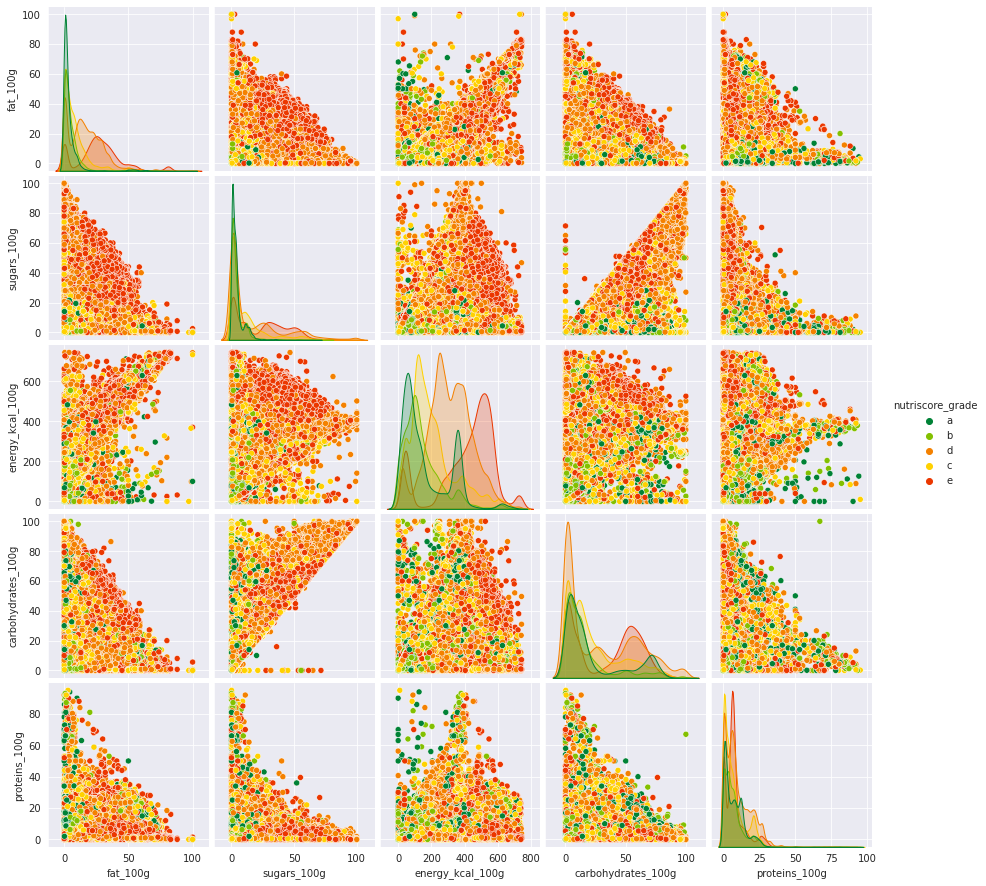

In [20]:
colors = ['#008236', '#83c000', '#f48100', '#ffd100','#eb3700']

sns.set_palette(sns.color_palette(colors))

var_repere = ['fat_100g', 'sugars_100g', 'energy_kcal_100g', "carbohydrates_100g", 'proteins_100g']

sns.pairplot(x_vars= df_food_fr[var_repere] , y_vars= df_food_fr[var_repere], data = df_food_fr, hue = "nutriscore_grade")
plt.show()

Repères nutritionnels:
Un système de qualification (Quantité élevée, Quantité modérée, Quantité Faible) permet de repérer la quantité de gras, de sucres... etc, contenue dans les produits alimentaires.

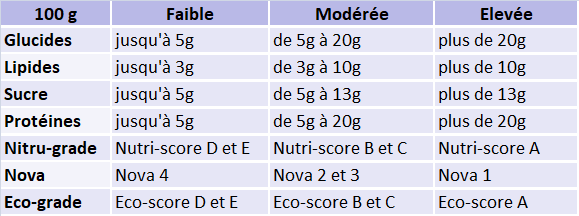

In [21]:
df_food_quantite = pd.DataFrame(df_food_fr)

In [22]:
df_food_quantite['quantite_lipide'] = ''
df_food_quantite['quantite_glucide'] = ''
df_food_quantite['quantite_proteine'] = ''
df_food_quantite['quantite_sucre'] = ''
df_food_quantite['nutrigrade'] = ''
df_food_quantite['nova'] = ''
df_food_quantite['ecograde'] = ''

def repere_quantite(df):

  df.loc[df.eval("sugars_100g <= 5"), "quantite_sucre"]="Faible"
  df.loc[df.eval("sugars_100g > 5"), "quantite_sucre"]="Moderee"
  df.loc[df.eval("sugars_100g > 13"), "quantite_sucre"]="Elevee"

  df.loc[df.eval("carbohydrates_100g <= 5"), "quantite_glucide"]="Faible"
  df.loc[df.eval("carbohydrates_100g > 5"), "quantite_glucide"]="Moderee"
  df.loc[df.eval("carbohydrates_100g > 20"), "quantite_glucide"]="Elevee"

  df.loc[df.eval("fat_100g <= 3"), "quantite_lipide"]="Faible"
  df.loc[df.eval("fat_100g > 3"), "quantite_lipide"]="Moyenne"
  df.loc[df.eval("fat_100g > 10"), "quantite_lipide"]="Elevee"

  df.loc[df.eval("proteins_100g <= 5"), "quantite_proteine"]="Faible"
  df.loc[df.eval("proteins_100g > 5"), "quantite_proteine"]="Moderee"
  df.loc[df.eval("proteins_100g > 20"), "quantite_proteine"]="Elevee"
  
  df.loc[df.eval("nutriscore_grade == 'd'"), "nutrigrade"]="Faible"
  df.loc[df.eval("nutriscore_grade == 'e'"), "nutrigrade"]="Faible"
  df.loc[df.eval("nutriscore_grade == 'b'"), "nutrigrade"]="Moderee"
  df.loc[df.eval("nutriscore_grade == 'c'"), "nutrigrade"]="Moderee"
  df.loc[df.eval("nutriscore_grade == 'a'"), "nutrigrade"]="Elevee"
  
  df.loc[df.eval("nova_group == 4"), "nova"]="Faible"
  df.loc[df.eval("nova_group == 3"), "nova"]="Moderee"
  df.loc[df.eval("nova_group == 2"), "nova"]="Moderee"
  df.loc[df.eval("nova_group == 1"), "nova"]="Elevee"
  
  df.loc[df.eval("ecoscore_grade_fr == 'd'"), "ecograde"]="Faible"
  df.loc[df.eval("ecoscore_grade_fr == 'e'"), "ecograde"]="Faible"
  df.loc[df.eval("ecoscore_grade_fr == 'b'"), "ecograde"]="Moderee"
  df.loc[df.eval("ecoscore_grade_fr == 'c'"), "ecograde"]="Moderee"
  df.loc[df.eval("ecoscore_grade_fr == 'a'"), "ecograde"]="Elevee"

  return df

In [23]:
repere_quantite(df_food_quantite)

,Unnamed: 0,code,nova_group,image_small_url,categories,pnns_groups_1,pnns_groups_2,product_name,carbohydrates_100g,energy_kcal_100g,energy_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr,quantite_lipide,quantite_glucide,quantite_proteine,quantite_sucre,nutrigrade,nova,ecograde
0,72,0000000005470,4,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Alime...",Cereals and potatoes,Bread,BAguette bressan,25.2,160.0,669.0,0.6,2.2,0.5,0.3580,0.14320,1.6,9.5,-4.0,a,75.0,b,Faible,Elevee,Moderee,Faible,Elevee,Faible,Moderee
1,341,0000000274722,4,https://images.openfoodfacts.org/images/produc...,"Plats préparés, Produits à la viande, Plats pr...",Composite foods,One-dish meals,Blanquette de Volaille et son Riz,15.3,107.0,450.0,0.5,2.2,0.9,0.7000,0.28000,0.5,6.8,0.0,b,52.0,c,Faible,Moderee,Moderee,Faible,Moderee,Faible,Moderee
2,365,0000000491228,4,https://images.openfoodfacts.org/images/produc...,"Produits laitiers, Desserts, Produits déshydra...",Milk and dairy products,Dairy desserts,Entremets Crème Brulée,75.5,466.0,1952.4,69.8,15.3,11.2,0.5000,0.20000,0.1,6.8,2.0,b,NaN,NaN,Elevee,Elevee,Moderee,Elevee,Moderee,Faible,
3,437,0000009125124,4,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Alime...",Fruits and vegetables,Fruits,Compote de Pomme,93.0,377.0,1577.0,66.0,0.5,0.1,0.0200,0.00800,0.0,1.5,1.0,b,81.0,b,Faible,Elevee,Faible,Elevee,Moderee,Faible,Moderee
4,438,0000009336247,4,https://images.openfoodfacts.org/images/produc...,"Snacks, Snacks sucrés, Confiseries, Bonbons",Sugary snacks,Sweets,Bonbons acidulés Raisin Fraise,93.3,400.0,1674.0,93.3,0.0,0.0,0.0000,0.00000,0.0,0.0,14.0,d,28.0,d,Faible,Elevee,Faible,Elevee,Faible,Faible,Faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130161,1977784,990530101006053432,3,https://images.openfoodfacts.org/images/produc...,"Produits laitiers, Produits fermentés, Produit...",Milk and dairy products,Cheese,Notre camembert bio,1.5,287.0,1203.0,1.5,24.0,16.0,1.5000,0.60000,0.0,17.0,14.0,d,73.0,b,Elevee,Faible,Moderee,Faible,Faible,Moderee,Moderee
130162,1977999,99111250,4,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Unsweetened beverages,Thé vert Earl grey,0.5,5.0,21.0,0.5,0.2,0.2,0.0254,0.01016,0.2,0.5,2.0,c,109.0,a,Faible,Faible,Faible,Faible,Moderee,Faible,Elevee
130163,1978258,99877026,3,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Sweetened beverages,Nectar de mangue,12.1,51.0,213.0,12.1,0.5,0.0,0.0300,0.01200,0.0,0.5,17.0,e,44.0,c,Faible,Moderee,Faible,Moderee,Faible,Moderee,Moderee
130164,1978294,99903336,3,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Sweetened beverages,Jus multifruits,10.0,42.0,176.0,10.0,0.0,0.0,0.0000,0.00000,0.0,0.5,11.0,e,31.0,d,Faible,Moderee,Faible,Moderee,Faible,Moderee,Faible


Ci-dessous un exemple d’aliments avec le repère nutritionnel tel affiché dans le dataframe :

In [24]:
df_food_quantite[['code', 'product_name', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'quantite_sucre','quantite_glucide', 'quantite_lipide', 'quantite_proteine', 'nutrigrade', 'nova', 'ecograde']]

,code,product_name,fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,quantite_sucre,quantite_glucide,quantite_lipide,quantite_proteine,nutrigrade,nova,ecograde
0,0000000005470,BAguette bressan,2.2,25.2,9.5,0.6,Faible,Elevee,Faible,Moderee,Elevee,Faible,Moderee
1,0000000274722,Blanquette de Volaille et son Riz,2.2,15.3,6.8,0.5,Faible,Moderee,Faible,Moderee,Moderee,Faible,Moderee
2,0000000491228,Entremets Crème Brulée,15.3,75.5,6.8,69.8,Elevee,Elevee,Elevee,Moderee,Moderee,Faible,
3,0000009125124,Compote de Pomme,0.5,93.0,1.5,66.0,Elevee,Elevee,Faible,Faible,Moderee,Faible,Moderee
4,0000009336247,Bonbons acidulés Raisin Fraise,0.0,93.3,0.0,93.3,Elevee,Elevee,Faible,Faible,Faible,Faible,Faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130161,990530101006053432,Notre camembert bio,24.0,1.5,17.0,1.5,Faible,Faible,Elevee,Moderee,Faible,Moderee,Moderee
130162,99111250,Thé vert Earl grey,0.2,0.5,0.5,0.5,Faible,Faible,Faible,Faible,Moderee,Faible,Elevee
130163,99877026,Nectar de mangue,0.5,12.1,0.5,12.1,Moderee,Moderee,Faible,Faible,Faible,Moderee,Moderee
130164,99903336,Jus multifruits,0.0,10.0,0.5,10.0,Moderee,Moderee,Faible,Faible,Faible,Moderee,Faible


Système de notation par produit

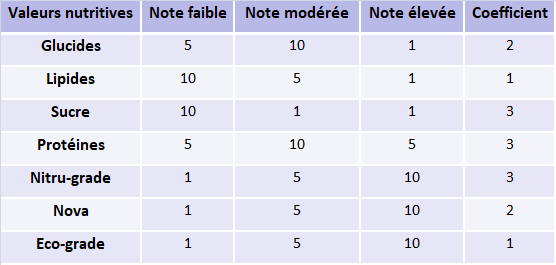

In [25]:
df_food_quantite['note_lipide'] = 0
df_food_quantite['note_glucide'] = 0
df_food_quantite['note_proteine'] = 0
df_food_quantite['note_sucre'] = 0
df_food_quantite['note_nutrigrade'] = 0
df_food_quantite['note_nova'] = 0
df_food_quantite['note_ecograde'] = 0

df_food_quantite['Diabete_score'] = 0
df_food_quantite['Diabete_grade'] = ''

def note_produit(df):

  df.loc[df.eval("quantite_sucre == 'Faible'"), "note_sucre"] =10
  df.loc[df.eval("quantite_sucre == 'Moderee'"), "note_sucre"] =1
  df.loc[df.eval("quantite_sucre == 'Elevee'"), "note_sucre"] =1

  df.loc[df.eval("quantite_glucide == 'Faible'"), "note_glucide"] =5
  df.loc[df.eval("quantite_glucide == 'Moderee'"), "note_glucide"] =10
  df.loc[df.eval("quantite_glucide == 'Elevee'"), "note_glucide"] =1

  df.loc[df.eval("quantite_lipide == 'Faible'"), "note_lipide"] =10
  df.loc[df.eval("quantite_lipide == 'Moderee'"), "note_lipide"] =5
  df.loc[df.eval("quantite_lipide == 'Elevee'"), "note_lipide"] =1

  df.loc[df.eval("quantite_proteine == 'Faible'"), "note_proteine"] =5
  df.loc[df.eval("quantite_proteine == 'Moderee'"), "note_proteine"] =10
  df.loc[df.eval("quantite_proteine == 'Elevee'"), "note_proteine"] =5

  df.loc[df.eval("nutrigrade == 'Faible'"), "note_nutrigrade"] =1
  df.loc[df.eval("nutrigrade == 'Moderee'"), "note_nutrigrade"] =5
  df.loc[df.eval("nutrigrade == 'Elevee'"), "note_nutrigrade"] =10

  df.loc[df.eval("nova == 'Faible'"), "note_nova"] =1
  df.loc[df.eval("nova == 'Moderee'"), "note_nova"] =5
  df.loc[df.eval("nova == 'Elevee'"), "note_nova"] =10

  df.loc[df.eval("ecograde == 'Faible'"), "note_ecograde"] =1
  df.loc[df.eval("ecograde == 'Moderee'"), "note_ecograde"] =5
  df.loc[df.eval("ecograde == 'Elevee'"), "note_ecograde"] =10

  df["Diabete_score"] = round((df["note_sucre"]*3 + df["note_glucide"]*2 + df["note_lipide"] + df["note_proteine"]*3 + df["note_nutrigrade"]*3 + df["note_nova"]*2 + df["note_ecograde"])/7,2)

  df.loc[df.eval("Diabete_score <= 4"), "Diabete_grade"] = "E"
  df.loc[df.eval("Diabete_score > 4"), "Diabete_grade"] = "D"
  df.loc[df.eval("Diabete_score > 8"), "Diabete_grade"] = "C"
  df.loc[df.eval("Diabete_score > 12"), "Diabete_grade"] = "B"
  df.loc[df.eval("Diabete_score >= 16"), "Diabete_grade"] = "A"

  return df

In [26]:
note_produit(df_food_quantite)

,Unnamed: 0,code,nova_group,image_small_url,categories,pnns_groups_1,pnns_groups_2,product_name,carbohydrates_100g,energy_kcal_100g,energy_100g,sugars_100g,fat_100g,saturated_fat_100g,salt_100g,sodium_100g,fiber_100g,proteins_100g,nutriscore_score,nutriscore_grade,ecoscore_score_fr,ecoscore_grade_fr,quantite_lipide,quantite_glucide,quantite_proteine,quantite_sucre,nutrigrade,nova,ecograde,note_lipide,note_glucide,note_proteine,note_sucre,note_nutrigrade,note_nova,note_ecograde,Diabete_score,Diabete_grade
0,72,0000000005470,4,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Alime...",Cereals and potatoes,Bread,BAguette bressan,25.2,160.0,669.0,0.6,2.2,0.5,0.3580,0.14320,1.6,9.5,-4.0,a,75.0,b,Faible,Elevee,Moderee,Faible,Elevee,Faible,Moderee,10,1,10,10,10,1,5,15.57,B
1,341,0000000274722,4,https://images.openfoodfacts.org/images/produc...,"Plats préparés, Produits à la viande, Plats pr...",Composite foods,One-dish meals,Blanquette de Volaille et son Riz,15.3,107.0,450.0,0.5,2.2,0.9,0.7000,0.28000,0.5,6.8,0.0,b,52.0,c,Faible,Moderee,Moderee,Faible,Moderee,Faible,Moderee,10,10,10,10,5,1,5,16.00,A
2,365,0000000491228,4,https://images.openfoodfacts.org/images/produc...,"Produits laitiers, Desserts, Produits déshydra...",Milk and dairy products,Dairy desserts,Entremets Crème Brulée,75.5,466.0,1952.4,69.8,15.3,11.2,0.5000,0.20000,0.1,6.8,2.0,b,NaN,NaN,Elevee,Elevee,Moderee,Elevee,Moderee,Faible,,1,1,10,1,5,1,0,7.57,D
3,437,0000009125124,4,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Alime...",Fruits and vegetables,Fruits,Compote de Pomme,93.0,377.0,1577.0,66.0,0.5,0.1,0.0200,0.00800,0.0,1.5,1.0,b,81.0,b,Faible,Elevee,Faible,Elevee,Moderee,Faible,Moderee,10,1,5,1,5,1,5,7.43,D
4,438,0000009336247,4,https://images.openfoodfacts.org/images/produc...,"Snacks, Snacks sucrés, Confiseries, Bonbons",Sugary snacks,Sweets,Bonbons acidulés Raisin Fraise,93.3,400.0,1674.0,93.3,0.0,0.0,0.0000,0.00000,0.0,0.0,14.0,d,28.0,d,Faible,Elevee,Faible,Elevee,Faible,Faible,Faible,10,1,5,1,1,1,1,5.14,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130161,1977784,990530101006053432,3,https://images.openfoodfacts.org/images/produc...,"Produits laitiers, Produits fermentés, Produit...",Milk and dairy products,Cheese,Notre camembert bio,1.5,287.0,1203.0,1.5,24.0,16.0,1.5000,0.60000,0.0,17.0,14.0,d,73.0,b,Elevee,Faible,Moderee,Faible,Faible,Moderee,Moderee,1,5,10,10,1,5,5,12.71,B
130162,1977999,99111250,4,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Unsweetened beverages,Thé vert Earl grey,0.5,5.0,21.0,0.5,0.2,0.2,0.0254,0.01016,0.2,0.5,2.0,c,109.0,a,Faible,Faible,Faible,Faible,Moderee,Faible,Elevee,10,5,5,10,5,1,10,13.14,B
130163,1978258,99877026,3,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Sweetened beverages,Nectar de mangue,12.1,51.0,213.0,12.1,0.5,0.0,0.0300,0.01200,0.0,0.5,17.0,e,44.0,c,Faible,Moderee,Faible,Moderee,Faible,Moderee,Moderee,10,10,5,1,1,5,5,9.43,C
130164,1978294,99903336,3,https://images.openfoodfacts.org/images/produc...,"Aliments et boissons à base de végétaux, Boiss...",Beverages,Sweetened beverages,Jus multifruits,10.0,42.0,176.0,10.0,0.0,0.0,0.0000,0.00000,0.0,0.5,11.0,e,31.0,d,Faible,Moderee,Faible,Moderee,Faible,Moderee,Faible,10,10,5,1,1,5,1,8.86,C


Afficher le "Diabete-score" et le "Diabete-grade"

In [27]:
df_food_quantite[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'quantite_sucre','quantite_glucide', 'quantite_lipide', 'quantite_proteine', 'nutrigrade', 'nova', 'ecograde', 'Diabete_score', 'Diabete_grade']][df_food_quantite['Diabete_score']>10]

,fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,quantite_sucre,quantite_glucide,quantite_lipide,quantite_proteine,nutrigrade,nova,ecograde,Diabete_score,Diabete_grade
0,2.20,25.2,9.50,0.60,Faible,Elevee,Faible,Moderee,Elevee,Faible,Moderee,15.57,B
1,2.20,15.3,6.80,0.50,Faible,Moderee,Faible,Moderee,Moderee,Faible,Moderee,16.00,A
7,0.00,95.0,0.00,0.00,Faible,Elevee,Faible,Faible,Moderee,Faible,Faible,10.71,C
12,10.30,0.0,18.90,0.00,Faible,Faible,Elevee,Moderee,Elevee,Elevee,Faible,17.43,A
14,7.20,17.6,15.30,0.50,Faible,Moderee,Moyenne,Moderee,Moderee,Faible,Faible,14.00,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130157,13.00,1.7,18.00,0.80,Faible,Faible,Elevee,Moderee,Moderee,Moderee,,13.71,B
130159,60.75,16.7,14.95,4.34,Faible,Moderee,Elevee,Moderee,Elevee,Elevee,Moderee,19.43,A
130161,24.00,1.5,17.00,1.50,Faible,Faible,Elevee,Moderee,Faible,Moderee,Moderee,12.71,B
130162,0.20,0.5,0.50,0.50,Faible,Faible,Faible,Faible,Moderee,Faible,Elevee,13.14,B
